In [1]:
#Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
#Realizando upload do arquivo
from google.colab import files
arq = files.upload()

Saving dados_para_analise.xlsx to dados_para_analise.xlsx


In [3]:
#Lendo dados da planilha Planilha_Referencia.xlsx
df = pd.read_excel("dados_para_analise.xlsx")

In [4]:
#Analisando 10 linhas iniciais da planilha
df.head(10)

,Aluno,CPF,Matrícula,Curso,Nome do Programa,Projeto,Orientador,Vagas Reservadas,Edital,Situação de Aluno,Situação do Bolsista,Data Inicio,Data Termino,Semestre Ingresso
0,ABNER LUCAS SILVA COSTA,132.161.026-29,201711070,Engenharia Civil (Bacharelado),Programa Institucional de Bolsas de Extensão e...,Estudo sobre eficiência energética e automação...,DANTON DIEGO FERREIRA,NÃO,EDITAL PROEC Nº 03 /2017,Matriculado,INATIVO,2018-04-01,2019-04-30,2018/1
1,Adauto Inácio da Silva,112.158.436-58,201110561,Educação Física (Bacharelado),Programa de Ações Comunitárias,Iniciação em Ações Comunitárias,JACKSON ANTONIO BARBOSA,SIM,PAC - EDITAL PRAEC Nº 02/2017,Conclusão dos requisitos acadêmicos,INATIVO,2017-08-01,2018-09-24,2017/1
2,Adauto Inácio da Silva,112.158.436-58,201110561,Educação Física (Bacharelado),Programa de Ações Comunitárias,Iniciação em Ações Comunitárias,JACKSON ANTONIO BARBOSA,NÃO,PAC - EDITAL PRAEC Nº 16/2018,Conclusão dos requisitos acadêmicos,INATIVO,2018-10-01,2019-01-21,2018/2
3,ADILSON JUNIOR SOARES ALVES,114.022.236-84,201710034,Agronomia (Bacharelado),Programa Institucional de Bolsas de Iniciação ...,Bolsas de Iniciação Científica,ELAINE APARECIDA DE SOUZA,SIM,Edital PRP Nº 06/2019 - PIBIC/UFLA,Matriculado,INATIVO,2019-10-01,2020-12-31,2019/2
4,ADRENE APOSTOLICO PEREIRA,100.942.357-67,201911193,Química (Licenciatura Plena),PROGRAMA DE BOLSA PARA ATLETA DE ALTO RENDIMENTO,Bolsa para Atletas de Alto Rendimento - Modali...,FERNANDO ROBERTO DE OLIVEIRA,NÃO,PROAR Nº19/2019/PIB/PRAEC/UFLA,Desistiu do curso,INATIVO,2019-07-01,2019-08-19,2019/1
5,ADRENE APOSTOLICO PEREIRA,100.942.357-67,201911193,Química (Licenciatura Plena),Programa de Bolsa Calouro,Vivência Acadêmica para Calouros,ROSSANO WAGNER DE LIMA BOTELHO,SIM,BOLSA CALOURO - EDITAL Nº 02/2019/PIB/PRAEC/UFLA,Desistiu do curso,INATIVO,2019-04-12,2019-06-30,2019/1
6,ADRENE APOSTOLICO PEREIRA,100.942.357-67,201911193,Química (Licenciatura Plena),Programa de Bolsa Calouro,Vivência Acadêmica para Calouros,BRUNO CESAR DE OLIVEIRA,SIM,BOLSA CALOURO - EDITAL Nº 02/2019/PIB/PRAEC/UFLA,Desistiu do curso,INATIVO,2019-04-12,2019-06-30,2019/1
7,ADRIANA FURTADO DE ALVARENGA,100.200.826-30,201621237,Engenharia de Alimentos (Bacharelado),Programa Institucional de Bolsas de Iniciação ...,Bolsas de Iniciação Científica,JOELMA PEREIRA,SIM,Edital PRP Nº 06/2019 - PIBIC/UFLA,Matriculado,INATIVO,2019-10-01,2020-12-31,2019/2
8,ADRIANA FURTADO DE ALVARENGA,100.200.826-30,201621237,Engenharia de Alimentos (Bacharelado),Programa Institucional de Bolsas de Iniciação ...,Bolsas de Iniciação Científica,JOELMA PEREIRA,SIM,Edital PRP Nº 07/2018 - PIBIC/UFLA,Matriculado,INATIVO,2018-10-01,2019-09-30,2018/2
9,ADRIANA FURTADO DE ALVARENGA,100.200.826-30,201621237,Engenharia de Alimentos (Bacharelado),Programa Institucional de Bolsas de Iniciação ...,Bolsas de Iniciação Científica,JOELMA PEREIRA,SIM,Edital PRP Nº 04/2016 - PIBIC/UFLA,Matriculado,INATIVO,2017-01-01,2017-07-31,2016/2


In [5]:
#Verificando tipos de dados de cada coluna
df.dtypes

Aluno                           object
CPF                             object
Matrícula                        int64
Curso                           object
Nome do Programa                object
Projeto                         object
Orientador                      object
Vagas Reservadas                object
Edital                          object
Situação de Aluno               object
Situação do Bolsista            object
Data Inicio             datetime64[ns]
Data Termino            datetime64[ns]
Semestre Ingresso               object
dtype: object

In [6]:
#Verificando existência de valores nulos
df.isnull().sum()


Aluno                   0
CPF                     0
Matrícula               0
Curso                   0
Nome do Programa        0
Projeto                 0
Orientador              0
Vagas Reservadas        0
Edital                  0
Situação de Aluno       0
Situação do Bolsista    0
Data Inicio             0
Data Termino            0
Semestre Ingresso       0
dtype: int64

In [7]:
#verificando Nome e Matrículas dos alunos por situação no curso
df.groupby(["Situação de Aluno","Aluno"]).sum()

Matrícula
Situação de Aluno                            Aluno                                          
Abandono do Curso                            ALEXSANDER VINICIUS TEIXEIRA CARLOTA  403424140
                                             ANNA WALESKA DE FREITAS RIGUEIRA      403420340
                                             BARBARA CLARICE HENRIQUES SALES       403621764
                                             BIANCA APARECIDA DA COSTA CARVALHO    403622272
                                             BIANCA SALES LESSA                    201511295
...                                                                                      ...
Transferência interna (área não relacionada) RAISSA MARCAL DELLA TORRE             201611195
                                             SNAIDER DUTRA TRINDADE                201821337
                                             THAIS RODRIGUES DIAS DA SILVA         201720302
                                             THALISSON CAIXETA DA SILVA PEREIRA    201820855
                                             THALITA TAKAYAMA                      201820482

[3108 rows x 1 columns]

In [9]:
#Verificando quantidade de alunos por situação no curso, ordenado por quantidade de alunos
df.groupby("Situação de Aluno").size().sort_values(ascending=False)

Situação de Aluno
Matriculado                                     2950
Conclusão dos requisitos acadêmicos             1823
Desistiu do curso                                278
Trancamento geral no Curso                       177
Abandono do Curso                                 65
Transferência interna (área não relacionada)      41
Desligado por não renovação de matrícula          37
Desligado                                         34
Transferência externa                             27
Concluiu a(s) Disciplina(s)                        9
Falecimento                                        7
Atividade Acadêmica Internacional                  2
dtype: int64

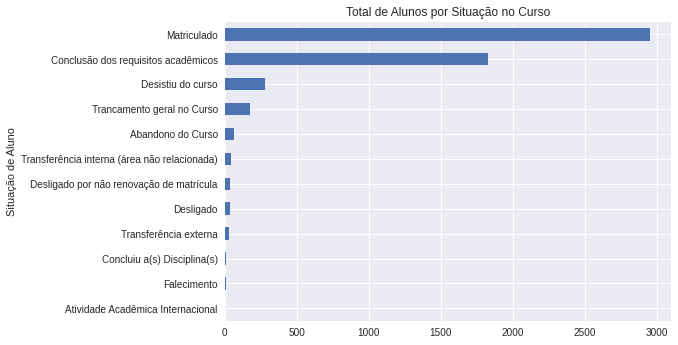

In [ ]:
#Gerando gráfico de quantidade de alunos por situação no curso
df.groupby("Situação de Aluno").size().sort_values(ascending=True).plot.barh(title="Total de Alunos por Situação no Curso");

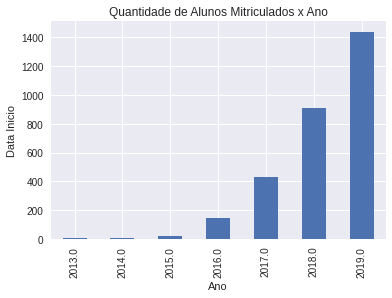

In [32]:
#Gerando gráfico com a quantidade de alunos matriculados por ano
df.groupby((df['Data Inicio'].dt.year) [df['Situação de Aluno'] == 'Matriculado']).size().plot.bar(title='Quantidade de Alunos Mitriculados x Ano')
plt.xlabel('Ano')
plt.ylabel('Data Inicio');

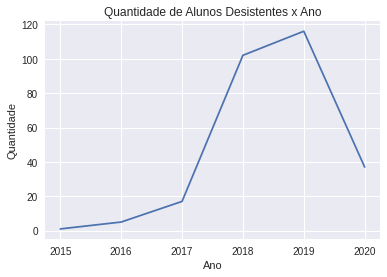

In [33]:
#Gerando gráfico com a quantidade de alunos desistentes por ano
df.groupby((df['Data Termino'].dt.year) [df['Situação de Aluno'] == 'Desistiu do curso']).size().plot(title='Quantidade de Alunos Desistentes x Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade');